In [1]:
!pip install ultralytics supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 24.9 MB/s eta 0:00:00


In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!cp -r /content/drive/MyDrive/Dataset/construction.zip /content/

In [4]:
!unzip /content/construction.zip

Archive:  /content/construction.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/ppe_0000_jpg.rf.7960e8f628d8a3fc17c6b858dec87a64.jpg  
 extracting: test/images/ppe_0004_jpg.rf.0a9886fc2b97ff81ff4ac5727ef66148.jpg  
 extracting: test/images/ppe_0008_jpg.rf.f3da9c637440a2a4dd256520f2f2e765.jpg  
 extracting: test/images/ppe_0009_jpg.rf.46d6856348dc2ed1e531bb1bc17983f7.jpg  
 extracting: test/images/ppe_0013_jpg.rf.f1bbbf35f9f80c25bd2744171b83ae6f.jpg  
 extracting: test/images/ppe_0014_jpg.rf.5b90e4a7707532584cbf89590d6f1e13.jpg  
 extracting: test/images/ppe_0038_jpg.rf.baf07f7ec6f9fdc82334d58a5a1e6db4.jpg  
 extracting: test/images/ppe_0058_jpg.rf.85334d41a89e79c1ce40b93d32338a3f.jpg  
 extracting: test/images/ppe_0094_jpg.rf.28111b2038f03030f229af28cdbe3484.jpg  
 extracting: test/images/ppe_0104_jpg.rf.8cd1e29b3e584494be060ccbd12001b0.jpg  
 extr

In [5]:
dataset_location = "/content/"

In [6]:
!ls {dataset_location}

construction.zip  drive		      README.roboflow.txt  test   valid
data.yaml	  README.dataset.txt  sample_data	   train


In [7]:
!cat {dataset_location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['helmet', 'no-helmet', 'no-vest', 'person', 'vest']

roboflow:
  workspace: personal-project-kej16
  project: construction-safety-gsnvb-jl6el
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/personal-project-kej16/construction-safety-gsnvb-jl6el/dataset/1

In [8]:
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt

--2026-02-25 08:31:44--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/99db71db-0946-4c10-94a0-b54baf471037?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-25T09%3A23%3A46Z&rscd=attachment%3B+filename%3Dyolov12n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-25T08%3A23%3A37Z&ske=2026-02-25T09%3A23%3A46Z&sks=b&skv=2018-11-09&sig=YJpTWGWGClnGcrmneitwutzpmJd1pJp9nyVLD%2BC0UxQ%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc3MjAwODYwNSwibmJmIjoxNzcyMDA4MzA1LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNv

In [9]:
from ultralytics import YOLO
model = YOLO('yolov12n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
results = model.train(
        data=f'{dataset_location}/data.yaml',
        epochs=50,
        batch=16,
        imgsz=640,
        exist_ok=True,
        patience=15,
        save_period=5,
        val=True,
        verbose=True,

        hsv_h=0.015,              # color augmentation
        hsv_s=0.7,
        hsv_v=0.4,
)

Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots

In [13]:
import locale
locale.getpreferredencoding = lambda :"UTF-8"

!ls {HOME}/runs/detect/train

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2520.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch2521.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch2522.jpg  weights
labels.jpg			 train_batch2.jpg


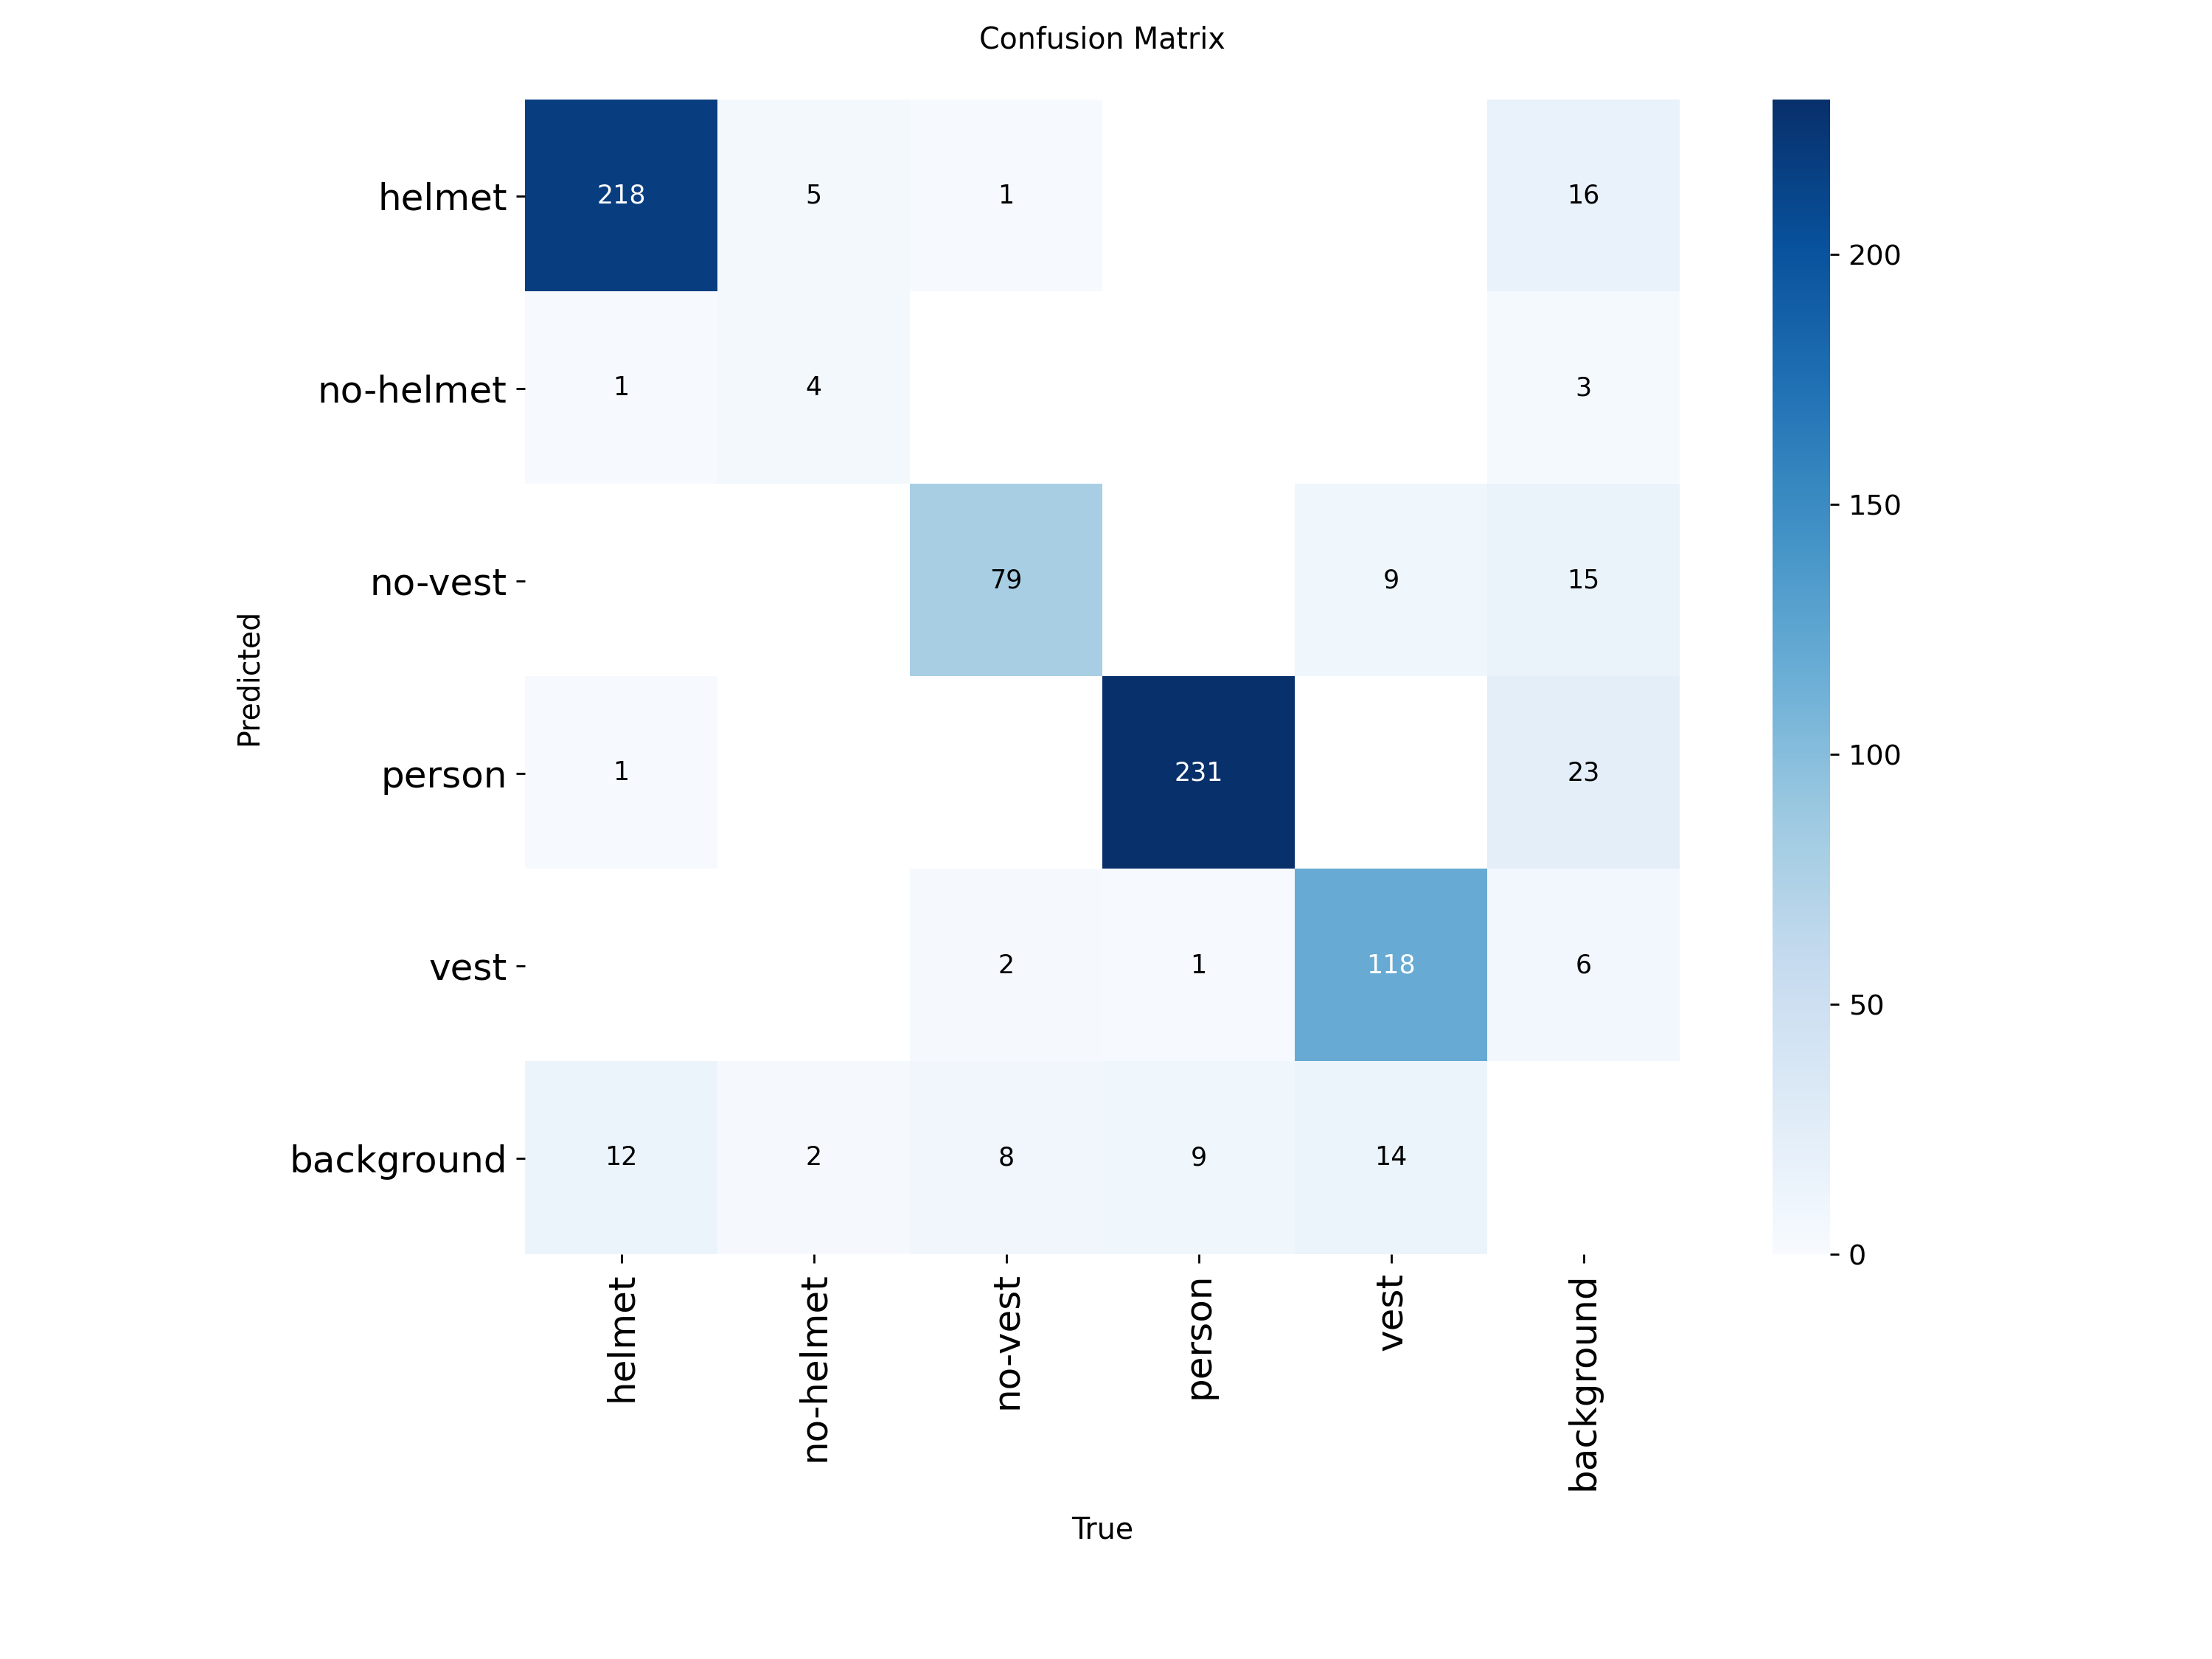

In [14]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

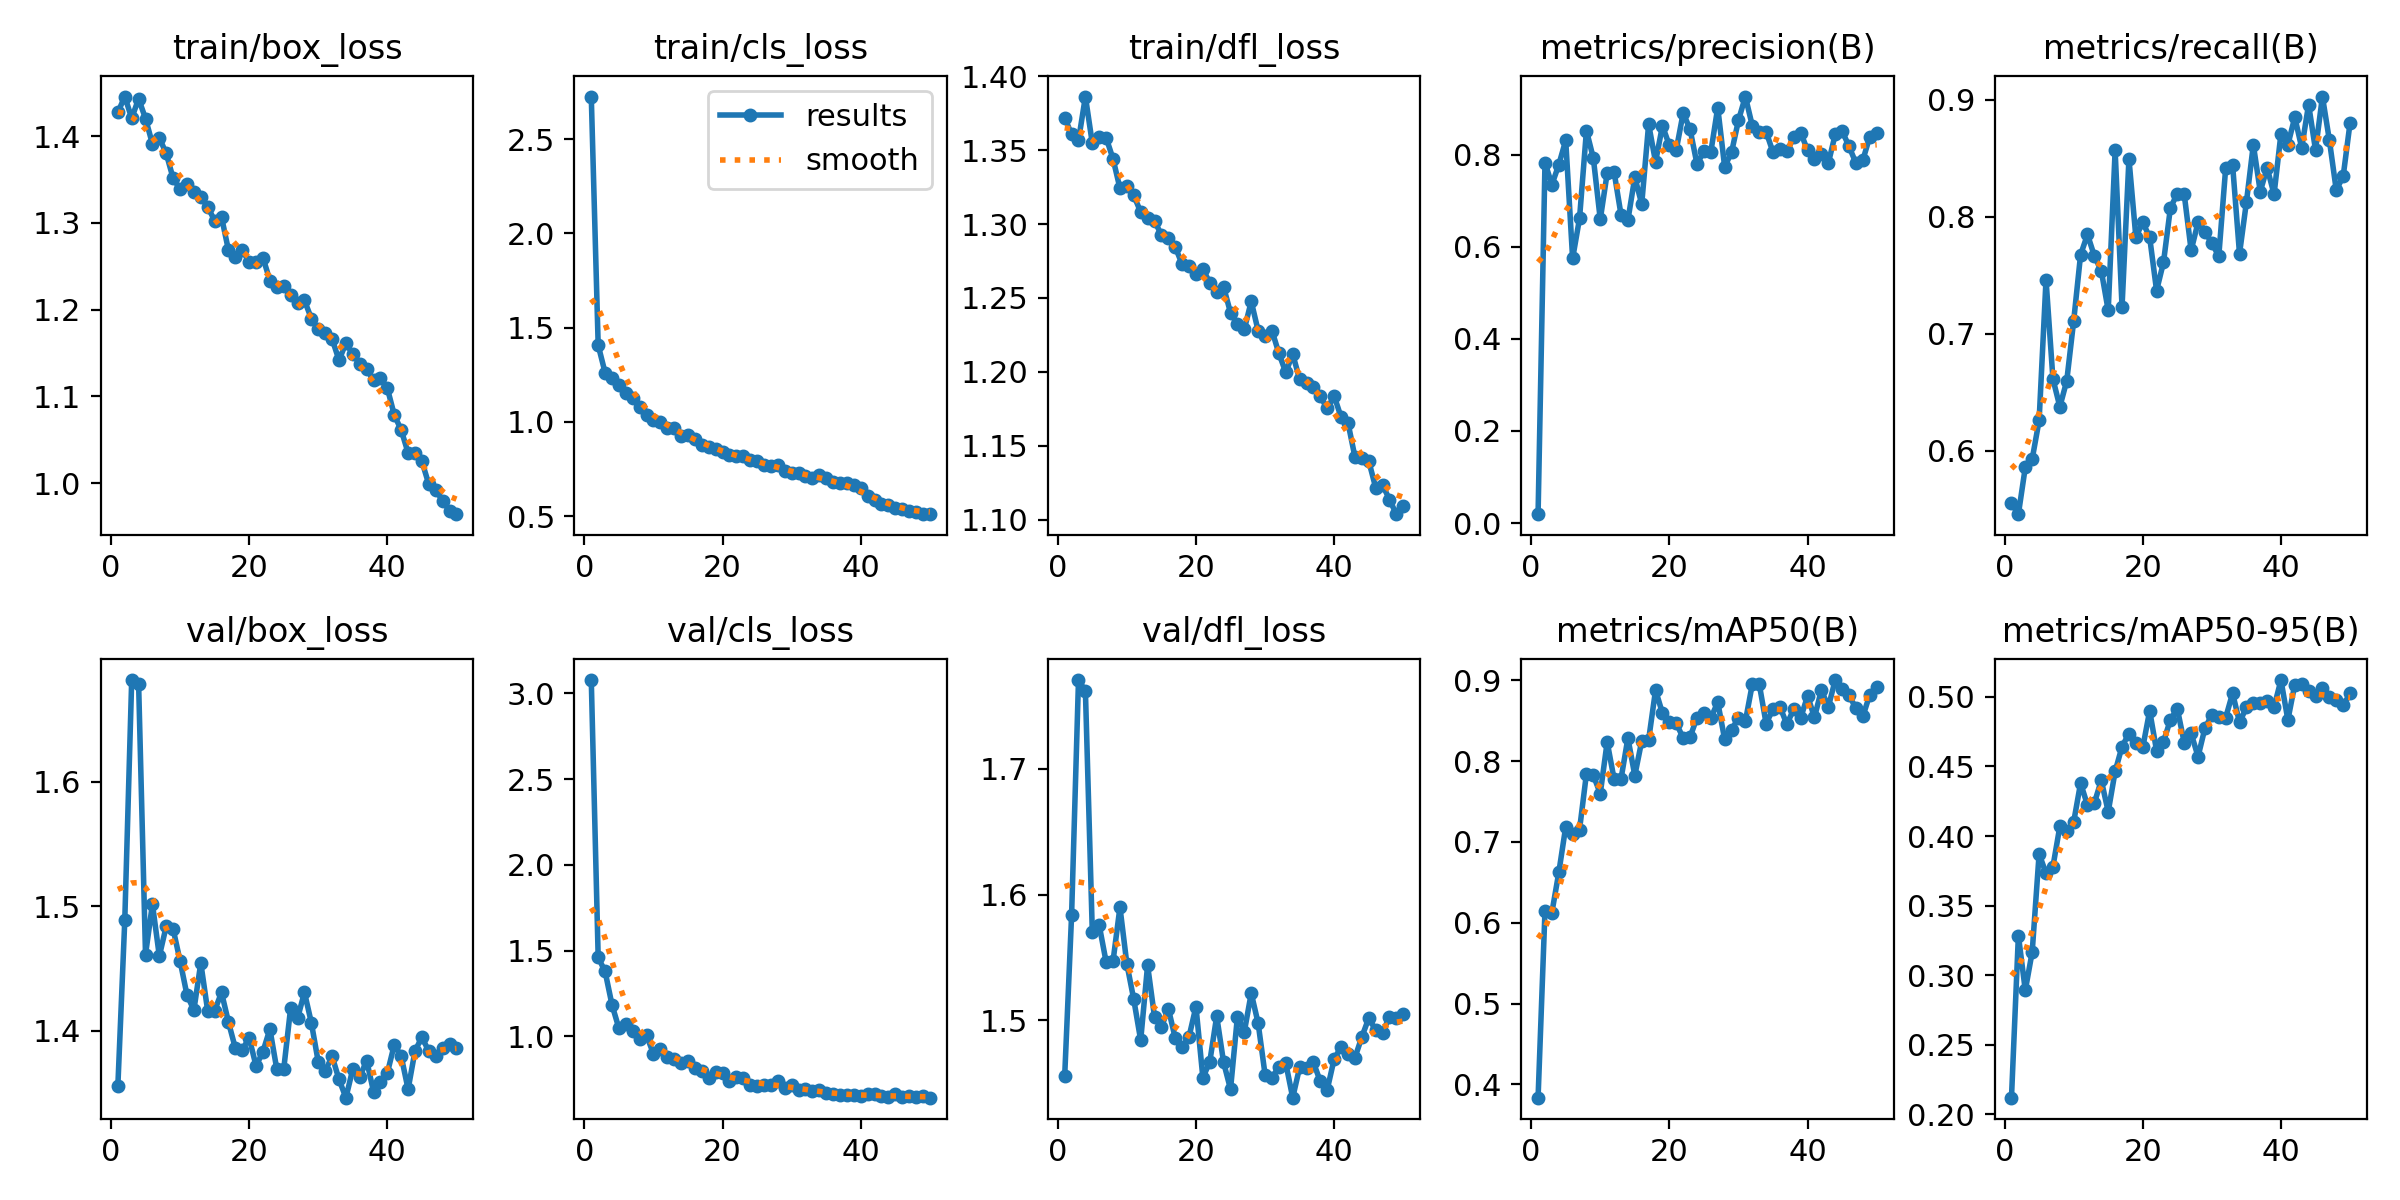

In [15]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [16]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

ds.classes

['helmet', 'no-helmet', 'no-vest', 'person', 'vest']

In [17]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [20]:
!scp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/Purwadhika/capstone4/best_construction.pt"